<a href="https://colab.research.google.com/github/jcj217-mc/Data_205/blob/main/Data205Project_IA_Discrimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import pandas as pd
import numpy as np
import os 
import json

In [ ]:
# .json file data imported as pandas data frame
df = pd.read_json('https://data.montgomerycountymd.gov/resource/tkbe-6sx5.json')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   filenum          89 non-null     object
 1   created_dt       89 non-null     object
 2   source           89 non-null     object
 3   allegation       89 non-null     object
 4   incident_status  89 non-null     object
 5   finding          76 non-null     object
dtypes: object(6)
memory usage: 4.3+ KB


In [ ]:
df.describe()

,filenum,created_dt,source,allegation,incident_status,finding
count,89,89,89,89,89,76
unique,87,73,2,2,2,8
top,15-0195,2020-12-14T00:00:00.000,External,Discrimination/Harassment,Completed,Declined
freq,2,4,47,53,76,21


In [ ]:
df.head()

,filenum,created_dt,source,allegation,incident_status,finding
0,13-0263,2013-09-24T00:00:00.000,External,Discrimination/Harassment,Completed,Unfounded
1,13-0303,2013-11-07T00:00:00.000,Internal,Discrim/Race/Sex,Completed,Unfounded
2,14-0058,2014-03-27T00:00:00.000,Internal,Discrimination/Harassment,Completed,Administrative Closure
3,14-0077,2014-04-22T00:00:00.000,Internal,Discrimination/Harassment,Completed,Sustained
4,14-0077,2014-04-22T00:00:00.000,Internal,Discrimination/Harassment,Completed,Administrative Closure


In [ ]:
df.allegation.unique()

array(['Discrimination/Harassment', 'Discrim/Race/Sex'], dtype=object)

In [ ]:
df.finding.unique()

array(['Unfounded', 'Administrative Closure', 'Sustained', 'Exonerated',
       'Corrective Action Taken', 'No Corrective Action Tak',
       'Insufficent Evidence', 'Declined', nan], dtype=object)

In [ ]:
# Changing Date to datetime
df.created_dt = pd.to_datetime(df.created_dt)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   filenum          89 non-null     object        
 1   created_dt       89 non-null     datetime64[ns]
 2   source           89 non-null     object        
 3   allegation       89 non-null     object        
 4   incident_status  89 non-null     object        
 5   finding          76 non-null     object        
dtypes: datetime64[ns](1), object(5)
memory usage: 4.3+ KB


In [ ]:
# add a column for Year
df['Year'] = df['created_dt'].dt.year
df.head(1)

,filenum,created_dt,source,allegation,incident_status,finding,Year
0,13-0263,2013-09-24,External,Discrimination/Harassment,Completed,Unfounded,2013


In [ ]:
df_allegation = df.loc[:,['allegation','Year']]
df_allegation

,allegation,Year
0,Discrimination/Harassment,2013
1,Discrim/Race/Sex,2013
2,Discrimination/Harassment,2014
3,Discrimination/Harassment,2014
4,Discrimination/Harassment,2014
...,...,...
84,Discrim/Race/Sex,2021
85,Discrim/Race/Sex,2021
86,Discrim/Race/Sex,2021
87,Discrimination/Harassment,2021


In [ ]:
df_allegation.allegation.value_counts()

Discrimination/Harassment    53
Discrim/Race/Sex             36
Name: allegation, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [ ]:
harass_df = pd.DataFrame(df[(df['allegation']=="Discrimination/Harassment")])
harass_df.head()

,filenum,created_dt,source,allegation,incident_status,finding,Year
0,13-0263,2013-09-24,External,Discrimination/Harassment,Completed,Unfounded,2013
2,14-0058,2014-03-27,Internal,Discrimination/Harassment,Completed,Administrative Closure,2014
3,14-0077,2014-04-22,Internal,Discrimination/Harassment,Completed,Sustained,2014
4,14-0077,2014-04-22,Internal,Discrimination/Harassment,Completed,Administrative Closure,2014
6,14-0157,2014-07-21,External,Discrimination/Harassment,Completed,Corrective Action Taken,2014


In [ ]:
Race_Sex_df = pd.DataFrame(df[(df['allegation']=="Discrim/Race/Sex")])

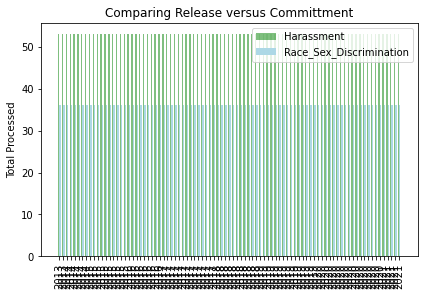

In [ ]:
#PLOT 1 Average Bond Amount between race & gender

labels = df.Year
Harass = harass_df.allegation.count()
Race_Sex = Race_Sex_df.allegation.count()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Harass, width, label='Harassment',color='green', alpha = 0.5)
rects2= ax.bar(x + width/2, Race_Sex, width, label='Race_Sex_Discrimination', color='lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Processed')
ax.set_title('Comparing Release versus Committment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

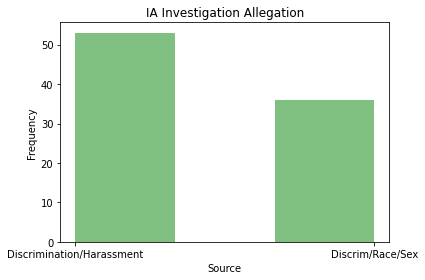

In [ ]:
plt.hist(df.allegation, facecolor='green', color = 'black', alpha=0.5, bins = 3 )
plt.title('IA Investigation Allegation')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

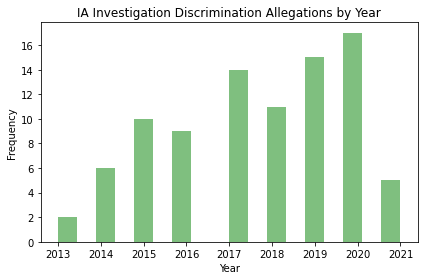

In [ ]:
plt.hist(df.Year, facecolor='green', color = 'black', alpha=0.5, bins = 18 )
plt.title('IA Investigation Discrimination Allegations by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
df_harassfinding = df.finding.value_counts()
df_harassfinding

Declined                    21
Administrative Closure      12
Unfounded                   10
No Corrective Action Tak    10
Sustained                    8
Insufficent Evidence         8
Exonerated                   5
Corrective Action Taken      2
Name: finding, dtype: int64

In [ ]:
# Successfully creating excel sheet with cell output
df_harassfinding.to_excel("./harassfindingdf.xlsx")

In [ ]:
df_harassfinding = pd.read_csv('harassfindingdf.csv')

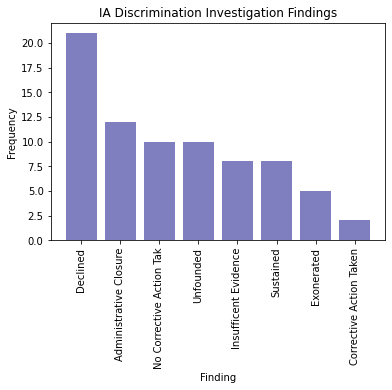

In [ ]:
plt.bar(df_harassfinding.Finding, df_harassfinding.Count, facecolor='navy', alpha=0.5, )
plt.title('IA Discrimination Investigation Findings')
plt.xlabel('Finding')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

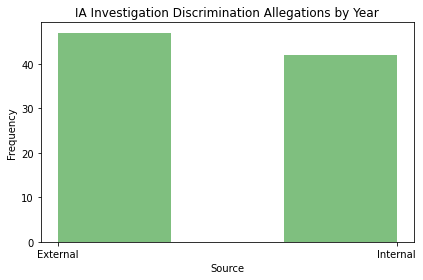

In [ ]:
plt.hist(df.source, facecolor='green', color = 'black', alpha=0.5, bins = 3 )
plt.title('IA Investigation Discrimination Allegations by Year')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
df.source.value_counts()

External    47
Internal    42
Name: source, dtype: int64

In [ ]:
47+42

89

In [ ]:
47/89 *100

52.80898876404494

In [ ]:
42/89 *100

47.19101123595505